## 範例重點

了解如何 reset Tensorflow Graph

學習如何以迴圈方式訓練不同超參數的模型

學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0721 12:54:18.021486 4538148288 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0721 12:54:18.023185 4538148288 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 12:54:18.112333 4538148288 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 12:54:18.114899 4538148288 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/back

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0721 12:54:18.335746 4538148288 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.3298 - acc: 0.0991 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 7s 141us/step - loss: 1.8307 - acc: 0.3456 - val_loss: 1.6290 - val_acc: 0.4210
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6050 - acc: 0.4292 - val_loss: 1.6442 - val_acc: 0.4162
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5133 - acc: 0.4605 - val_loss: 1.5639 - val_acc: 0.4364
Epoch 4/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.4524 - acc: 0.4838 - val_loss: 1.4898 - val_acc: 0.4568
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.4015 - acc: 0.5008 - val_loss: 1.4760 - val_acc: 0.4791
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3607 - acc: 0.5180 - val_loss: 1.4288 - val_acc: 0.4899
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.3232 - acc: 0.5298 - val_loss: 1.4113 - val_acc: 0.4978
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 9s 171us/step - loss: 1.8076 - acc: 0.3670 - val_loss: 1.7590 - val_acc: 0.3873
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7253 - acc: 0.3974 - val_loss: 1.6971 - val_acc: 0.3984
Epoch 4/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6652 - acc: 0.4172 - val_loss: 1.6466 - val_acc: 0.4242
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6164 - acc: 0.4348 - val_loss: 1.6009 - val_acc: 0.4356
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5749 - acc: 0.4477 - val_loss: 1.5694 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5411 - acc: 0.4596 - val_loss: 1.5463 - val_acc: 0.4502
Epoch 8/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.5096 - acc: 0.4706 - val_loss: 1.5291 - val_acc: 0.4642
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 156us/step - loss: 2.0526 - acc: 0.2718 - val_loss: 2.0226 - val_acc: 0.2796
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9943 - acc: 0.2937 - val_loss: 1.9737 - val_acc: 0.2997
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9531 - acc: 0.3104 - val_loss: 1.9388 - val_acc: 0.3166
Epoch 6/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.9208 - acc: 0.3252 - val_loss: 1.9100 - val_acc: 0.3329
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8949 - acc: 0.3344 - val_loss: 1.8876 - val_acc: 0.3356
Epoch 8/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8736 - acc: 0.3443 - val_loss: 1.8668 - val_acc: 0.3406
Epoch 9/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.8552 - acc: 0.3523 - val_loss: 1.8489 - val_acc: 0.3517
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 9s 171us/step - loss: 2.2281 - acc: 0.1819 - val_loss: 2.2155 - val_acc: 0.1911
Epoch 5/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.2079 - acc: 0.1962 - val_loss: 2.1961 - val_acc: 0.2064
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1903 - acc: 0.2073 - val_loss: 2.1797 - val_acc: 0.2169
Epoch 7/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.1749 - acc: 0.2168 - val_loss: 2.1652 - val_acc: 0.2260
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1613 - acc: 0.2247 - val_loss: 2.1521 - val_acc: 0.2332
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1489 - acc: 0.2299 - val_loss: 2.1402 - val_acc: 0.2398
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1374 - acc: 0.2367 - val_loss: 2.1290 - val_acc: 0.2459
Epoch 11/50
50000/50000 [==================

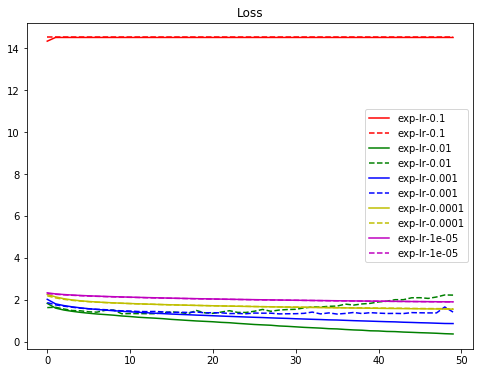

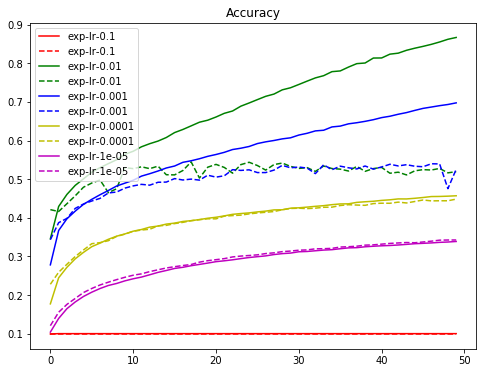

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work

請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.3

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練

Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    """ # 作業：請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現 """
    """ 範例採用 optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.95)"""
    # 這裡嘗試   optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=0.3)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0299 - acc: 0.2828 - val_loss: 1.9202 - val_acc: 0.3141
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8432 - acc: 0.3559 - val_loss: 1.8107 - val_acc: 0.3631
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7688 - acc: 0.3789 - val_loss: 1.7867 - val_acc: 0.3727
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7169 - acc: 0.3982 - val_loss: 1.6917 - val_acc: 0.4069
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6761 - acc: 0.4123 - val_loss: 1.7008 - val_acc: 0.4080
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6457 - acc: 0.4228 - val_loss: 1.6902 - val_acc: 0.4035
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6160 - acc: 0.4348 - val_loss: 1.7319 - 

50000/50000 [==============================] - 10s 191us/step - loss: 2.2468 - acc: 0.1767 - val_loss: 2.1885 - val_acc: 0.2267
Epoch 2/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1499 - acc: 0.2427 - val_loss: 2.1143 - val_acc: 0.2510
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0871 - acc: 0.2665 - val_loss: 2.0607 - val_acc: 0.2653
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.0384 - acc: 0.2821 - val_loss: 2.0151 - val_acc: 0.2892
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9973 - acc: 0.2992 - val_loss: 1.9791 - val_acc: 0.3044
Epoch 6/50
50000/50000 [==============================] - 30s 595us/step - loss: 1.9635 - acc: 0.3111 - val_loss: 1.9487 - val_acc: 0.3129
Epoch 7/50
50000/50000 [==============================] - 44s 888us/step - loss: 1.9352 - acc: 0.3229 - val_loss: 1.9229 - val_acc: 0.3186
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 7s 139us/step - loss: 2.3003 - acc: 0.1405 - val_loss: 2.2842 - val_acc: 0.1503
Epoch 3/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.2766 - acc: 0.1517 - val_loss: 2.2656 - val_acc: 0.1646
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2600 - acc: 0.1617 - val_loss: 2.2509 - val_acc: 0.1761
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2460 - acc: 0.1702 - val_loss: 2.2380 - val_acc: 0.1839
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.2335 - acc: 0.1778 - val_loss: 2.2262 - val_acc: 0.1888
Epoch 7/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.2219 - acc: 0.1854 - val_loss: 2.2151 - val_acc: 0.1956
Epoch 8/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2110 - acc: 0.1913 - val_loss: 2.2046 - val_acc: 0.1992
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 132us/step - loss: 2.3194 - acc: 0.1286 - val_loss: 2.3172 - val_acc: 0.1279
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.3133 - acc: 0.1301 - val_loss: 2.3115 - val_acc: 0.1289
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.3079 - acc: 0.1324 - val_loss: 2.3063 - val_acc: 0.1315
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3030 - acc: 0.1341 - val_loss: 2.3016 - val_acc: 0.1330
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.2985 - acc: 0.1366 - val_loss: 2.2973 - val_acc: 0.1352
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.2943 - acc: 0.1390 - val_loss: 2.2933 - val_acc: 0.1380
Epoch 9/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2904 - acc: 0.1409 - val_loss: 2.2896 - val_acc: 0.1399
Epoch 10/50
50000/50000 [====================

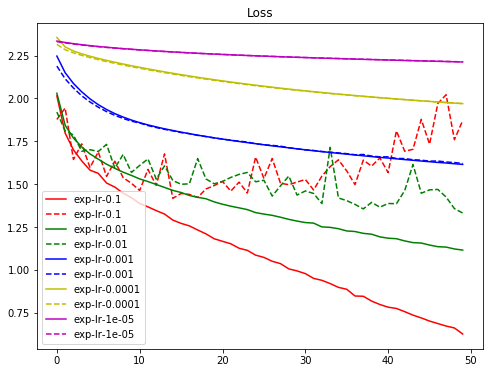

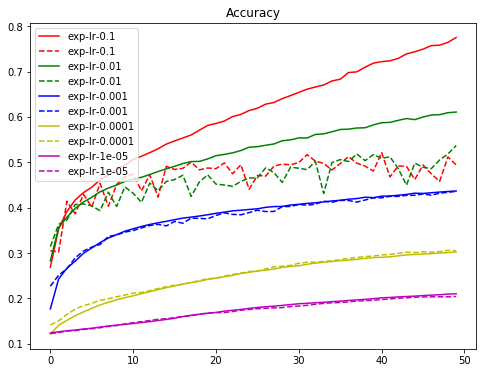

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 參考資料


### 知乎 - 深度學習超參數 Learning rate 與 Momentum 理解

- Learning rate：每次修正的幅度，太大則無法收斂，太小則修正過慢

- Weight decay：增加正則用以避免 overfitting

- Momentum：在修正方向上，增加動量，如牛頓定律一樣，增加動量有機會讓卡在局部最小值的狀態跳離

- Learning rate decay：讓Learning rate 可以隨訓練進行慢慢減小，讓收斂狀態趨於穩



--

## 參考連結：

## [Estimating an Optimal Learning Rate For a Deep Neural Network](https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0)

The learning rate is one of the most important hyper-parameters to tune for training deep neural networks.

In this post, I’m describing a simple and powerful way to find a reasonable learning rate that I learned from [fast.ai Deep Learning course](http://www.fast.ai/?source=post_page---------------------------). I’m taking the new version of the course in person at [University of San Francisco](https://www.usfca.edu/data-institute/certificates/deep-learning-part-one?source=post_page---------------------------). It’s not available to the general public yet, but will be at the end of the year at [course.fast.ai](http://course.fast.ai/?source=post_page---------------------------) (which currently has the last year’s version).



### There must be a smarter way
Leslie N. Smith describes a powerful technique to select a range of learning rates for a neural network in section 3.3 of the 2015 paper [“Cyclical Learning Rates for Training Neural Networks”](https://arxiv.org/abs/1506.01186?source=post_page---------------------------) .
The trick is to train a network starting from a low learning rate and increase the learning rate exponentially for every batch.

![img2](https://miro.medium.com/max/778/1*zgm3iy7aD4ZsXLiva0xtFg.png)



Record the learning rate and training loss for every batch. Then, plot the loss and the learning rate. Typically, it looks like this:

![img3](https://miro.medium.com/max/778/1*HVj_4LWemjvOWv-cQO9y9g.png)



First, with low learning rates, the loss improves slowly, then training accelerates until the learning rate becomes too large and loss goes up: the training process diverges.

We need to select a point on the graph with the fastest decrease in the loss. In this example, the loss function decreases fast when the learning rate is between 0.001 and 0.01.

Another way to look at these numbers is calculating the rate of change of the loss (a derivative of the loss function with respect to iteration number), then plot the change rate on the y-axis and the learning rate on the x-axis.

![img4](https://miro.medium.com/max/834/1*eYewkhRqRyGg7UsNNaX0Hg.png)



It looks too noisy, let’s smooth it out using simple moving average.

![img5](https://miro.medium.com/max/834/1*87mKq_XomYyJE29l91K0dw.png)


This looks better. On this graph, we need to find the minimum. It is close to lr=0.01.



--

## [cs231n: learning and evaluation](http://cs231n.github.io/neural-networks-3/)

--


## [知乎-深度學習超參數簡單理解>>>>>>learning rate,weight decay 和 momentum](https://zhuanlan.zhihu.com/p/23906526)


說到這些參數就會想到Stochastic Gradient Descent (SGD)！其實這些參數在caffe.proto中對caffe網絡中出現的各項參數做了詳細的解釋。

### Learning Rate

學習率決定了權值更新的速度，設置得太大會使結果超過最優值，太小會使下降速度過慢。<font color="red">僅靠人為干預調整參數需要不斷修改學習率，因此後面3種參數都是基於自適應的思路提出的解決方案。後面3中參數分別為：Weight Decay 權值衰減，Momentum 動量和Learning Rate Decay 學習率衰減。</font>

![img11](https://www.zhihu.com/equation?tex=%5Comega_%7Bi%7D%5Cleftarrow++%5Comega_%7Bi%7D+-+%5Ceta+%5Cfrac%7B%5Cpartial+E%7D%7B%5Cpartial+%5Comega_%7Bi%7D%7D+)

![img12](https://www.zhihu.com/equation?tex=%5Comega_%7Bi%7D%5Cleftarrow++m%5Ccdot+%5Comega_%7Bi%7D+-+%5Ceta+%5Cfrac%7B%5Cpartial+E%7D%7B%5Cpartial+%5Comega_%7Bi%7D%7D+)


> ### <font color="red">1. Weight decay</font>


> 在實際應用中，為了避免網絡的過擬合，必須對價值函數（Cost function）加入一些正則項，在SGD中加入 $\eta \lambda w_i$ 這一正則項對這個Cost function進行規範化：

> ![img13](https://www.zhihu.com/equation?tex=%5Comega_%7Bi%7D%5Cleftarrow++%5Comega_%7Bi%7D+-+%5Ceta+%5Cfrac%7B%5Cpartial+E%7D%7B%5Cpartial+%5Comega_%7Bi%7D%7D+-+%5Ceta+%5Clambda+%5Comega+_%7Bi%7D+)

> <font color="red">上面這個公式基本思想就是減小不重要的參數對最後結果的影響，網絡中有用的權重則不會收到Weight decay影響。</font>

> 為了避免出現overfitting,會給誤差函數添加一個懲罰項，常用的懲罰項是所有權重的平方乘以一個衰減常量之和。其用來懲罰大的權值。

-

> ### <font color="red">2. Momentum</font>


> 動量來源於牛頓定律，基本思想是為了找到最優加入“慣性”的影響，當誤差曲面中存在平坦區域，SGD就可以更快的學習。

> ![img14](https://www.zhihu.com/equation?tex=%5Comega_%7Bi%7D%5Cleftarrow++m%5Ccdot+%5Comega_%7Bi%7D+-+%5Ceta+%5Cfrac%7B%5Cpartial+E%7D%7B%5Cpartial+%5Comega_%7Bi%7D%7D+)

-

> ### <font color="red">3. Learning Rate Decay </font>


> 該方法是為了提高SGD尋優能力，具體就是每次迭代的時候減少學習率的大小。

> ![img15](https://www.zhihu.com/equation?tex=%5Ceta+%5Cleft%28+s+%5Cright%29+%3D%5Cfrac%7B%5Ceta+_%7B0%7D+%7D%7B1%2Bs%5Ccdot+%5Ceta+_%7Bn%7D%7D+)

> [Difference between neural net weight decay and learning rate](https://link.zhihu.com/?target=http%3A//stats.stackexchange.com/questions/29130/difference-between-neural-net-weight-decay-and-learning-rate)

-


接下來是我在知乎查詢到的一點資料（整理了供大家參考學習）：

<font color = "red"> **weight decay**（權值衰減） 的使用既不是為了提高收斂精確度也不是為了提高收斂速度，其最終目的是防止過擬合。</font>在損失函數中，weight decay是放在正則項（regularization）前面的一個係數，正則項一般指示模型的複雜度，所以weight decay的作用是調節模型複雜度對損失函數的影響，若weight decay很大，則復雜的模型損失函數的值也就大。


<font color = "red">**momentum** 是梯度下降法中一種常用的加速技術。</font>對於一般的SGD，其表達式為 $ x ← x - \alpha * dx $ ,  $ x $ 沿負梯度方向下降。

而帶momentum項的SGD則寫生如下形式：
 $ \nu = \beta * \nu - \alpha * dx $ 
 
 $  x ← x + \nu $ 

<font color = "red">其中 $ \beta $ 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即 $ \nu $ ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程。</font>


<font color = "red">**normalization**（batch normalization）: </font>
    
batch normalization的是指在神經網絡中激活函數的前面，將 $ \omega x + b $ 按照特徵進行normalization，這樣做的好處有三點：

1. 提高梯度在網絡中的流動。Normalization能夠使特徵全部縮放到[0,1]，這樣在反向傳播時候的梯度都是在1左右，避免了梯度消失現象。

2. 提升學習速率。歸一化後的數據能夠快速的達到收斂。

3. 減少模型訓練對初始化的依賴。

--


## [Adam那麼棒，為什麼還對SGD念念不忘(1) —— 一個框架看懂優化算法](https://zhuanlan.zhihu.com/p/32230623)

深度學習優化算法經歷了SGD -> SGDM -> NAG ->AdaGrad -> AdaDelta -> Adam -> Nadam 這樣的發展歷程。

### SGD

先來看SGD。SGD沒有動量的概念

SGD最大的缺點是下降速度慢，而且可能會在溝壑的兩邊持續震盪，停留在一個局部最優點。

-

### SGD with Momentum

為了抑制SGD的震盪，SGDM認為梯度下降過程可以加入慣性。

下坡的時候，如果發現是陡坡，那就利用慣性跑的快一些。SGDM全稱是SGD with momentum，在SGD基礎上引入了一階動量：


一階動量是各個時刻梯度方向的指數移動平均值，約等於最近 $ 1 / (1 - \beta_1) $ 個時刻的梯度向量和的平均值。



也就是說，t時刻的下降方向，不僅由當前點的梯度方向決定，而且由此前累積的下降方向決定。 $ \beta $ 的經驗值為0.9，這就意味著下降方向主要是此前累積的下降方向，並略微偏向當前時刻的下降方向。想像高速公路上汽車轉彎，在高速向前的同時略微偏向，急轉彎可是要出事的。

-

### SGD with Nesterov Acceleration

SGD 還有一個問題是困在局部最優的溝壑裡面震盪。想像一下你走到一個盆地，四周都是略高的小山，你覺得沒有下坡的方向，那就只能待在這裡了。可是如果你爬上高地，就會發現外面的世界還很廣闊。因此，我們不能停留在當前位置去觀察未來的方向，而要向前一步、多看一步、看遠一些。


### NAG

NAG全稱Nesterov Accelerated Gradient，是在SGD、SGD-M的基礎上的進一步改進，改進點在於步驟1。我們知道在時刻t的主要下降方向是由累積動量決定的，自己的梯度方向說了也不算，那與其看當前梯度方向，不如先看看如果跟著累積動量走了一步，那個時候再怎麼走。因此，NAG在步驟1，不計算當前位置的梯度方向，而是計算如果按照累積動量走了一步，那個時候的下降方向：

-

### AdaGrad

此前我們都沒有用到二階動量。二階動量的出現，才意味著“自適應學習率”優化算法時代的到來。

AdaDelta / RMSProp


由於AdaGrad單調遞減的學習率變化過於激進，我們考慮一個改變二階動量計算方法的策略：不累積全部歷史梯度，而只關注過去一段時間窗口的下降梯度。這也就是AdaDelta名稱中Delta的來歷。



修改的思路很簡單。前面我們講到，指數移動平均值大約就是過去一段時間的平均值，因此我們用這一方法來計算二階累積動量：

[公式]

這就避免了二階動量持續累積、導致訓練過程提前結束的問題了。

-

### Adam


談到這裡，Adam和Nadam的出現就很自然而然了——它們是前述方法的集大成者。我們看到，SGD-M在SGD基礎上增加了一階動量，AdaGrad和AdaDelta在SGD基礎上增加了二階動量。把一階動量和二階動量都用起來，就是Adam了——Adaptive + Momentum。



SGD的一階動量：

[公式]

加上AdaDelta的二階動量：

[公式]


優化算法裡最常見的兩個超參數[公式]就都在這裡了，前者控制一階動量，後者控制二階動量。

-

### Nadam

最後是Nadam。我們說Adam是集大成者，但它居然遺漏了Nesterov，這還能忍？必須給它加上，按照NAG的步驟1：

[公式]

這就是Nesterov + Adam = Nadam了。


--



## [Adam那麼棒，為什麼還對SGD念念不忘(2)—— Adam的兩宗罪](https://zhuanlan.zhihu.com/p/32262540)


## <font color="orange">Adam罪狀一：可能不收斂</font>

這篇是正在深度學習領域頂級會議之一ICLR 2018匿名審稿中的[On the Convergence of Adam and Beyond](https://link.zhihu.com/?target=https%3A//openreview.net/forum%3Fid%3DryQu7f-RZ)，探討了Adam算法的收斂性，通過反例證明了Adam在某些情況下可能會不收斂。


其中，SGD沒有用到二階動量，因此學習率是恆定的（實際使用過程中會採用學習率衰減策略，因此學習率遞減）。AdaGrad的二階動量不斷累積，單調遞增，因此學習率是單調遞減的。因此，這兩類算法會使得學習率不斷遞減，最終收斂到0，模型也得以收斂。



但AdaDelta和Adam則不然。二階動量是固定時間窗口內的累積，隨著時間窗口的變化，遇到的數據可能發生巨變，使得[公式]可能會時大時小，不是單調變化。這就可能在訓練後期引起學習率的震盪，導致模型無法收斂。



這篇文章也給出了一個修正的方法。由於Adam中的學習率主要是由二階動量控制的，為了保證算法的收斂，可以對二階動量的變化進行控制，避免上下波動。

![img20](https://www.zhihu.com/equation?tex=V_t+%3D+max%28%5Cbeta_2+%2A+V_%7Bt-1%7D+%2B+%281-%5Cbeta_2%29+g_t%5E2%2C+V_%7Bt-1%7D%29)

通過這樣修改，就保證了 $ ||V_t|| >= ||V_{t-1} || $ ，從而使得學習率單調遞減。


## <font color="orange">Adam罪狀二：可能錯過全局最優解</font>


深度神經網絡往往包含大量的參數，在這樣一個維度極高的空間內，非凸的目標函數往往起起伏伏，擁有無數個高地和窪地。有的是高峰，通過引入動量可能很容易越過；但有些是高原，可能探索很多次都出不來，於是停止了訓練。


<font color="red">於是他們提出了一個用來改進Adam的方法：前期用Adam，享受Adam快速收斂的優勢；後期切換到SGD，慢慢尋找最優解。這一方法以前也被研究者們用到，不過主要是根據經驗來選擇切換的時機和切換後的學習率。這篇文章把這一切換過程傻瓜化，給出了切換SGD的時機選擇方法，以及學習率的計算方法，效果看起來也不錯。</font>



